In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from scipy.stats import linregress

In [9]:
#Read CSV as DataFrame and display results
Listings = Path("Airbnb Data/Listings.csv")

Listings_df = pd.read_csv(Listings, encoding="ISO-8859-1", low_memory=False)

Listings_df.head()


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [10]:
#Find total number of listings
number_of_listings = Listings_df["listing_id"].nunique()
number_of_listings

279712

In [11]:
#Only show columns that are relevant
Listings_df = Listings_df.loc[:, ["listing_id", "name", "city", "latitude", "longitude", "property_type", "room_type", "accommodates", \
                                "bedrooms", "amenities", "price"]]
Listings_df

,listing_id,name,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price
0,281420,"Beautiful Flat in le Village Montmartre, Paris",Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120
2,4082273,"Lovely apartment with Terrace, 60m2",Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89
3,4797344,Cosy studio (close to Eiffel tower),Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60
...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,Paris,48.82701,2.31419,Entire apartment,Entire place,2,1.0,"[""Iron"", ""Heating"", ""Washer"", ""Dedicated works...",120
279708,38538692,Cozy Studio in Montmartre,Paris,48.89309,2.33206,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Iron"", ""Heating"", ""Washer"", ""Hair...",60
279709,38683356,Nice and cosy mini-appartement in Paris,Paris,48.88699,2.34920,Entire apartment,Entire place,2,1.0,"[""Paid parking off premises"", ""Shampoo"", ""Firs...",50
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,Paris,48.86687,2.38123,Entire apartment,Entire place,2,1.0,"[""TV"", ""Iron"", ""Kitchen"", ""Hangers"", ""Smoke al...",105


In [12]:
#Counts how many times each amenity appears
Listings_df['amenities'] = Listings_df['amenities'].str.split(',')
Amenities_Count = Listings_df.explode('amenities')
Amenities_Count['amenities'].value_counts()

amenities
 "Wifi"                                                   248800
 "Essentials"                                             238335
 "Kitchen"                                                220097
 "Long term stays allowed"                                215997
 "Hangers"                                                198799
                                                           ...  
 "Sharp refrigerator"                                          1
 "Altus refrigerator"                                          1
 "Paid parking garage on premises \u2013 EUR40 per day         1
 "74\" HDTV with Chromecast"                                   1
 "Gautier Bluetooth sound system"                              1
Name: count, Length: 3881, dtype: int64

In [16]:
#Split each amenity into a separate line, then grouped the amenities by their listing_id and counted how many 
#amenities each listing offered. 
Separated_Amenities_df = Amenities_Count.explode("amenities")
Amenities_Per_Airbnb = Separated_Amenities_df.groupby("listing_id")["amenities"].count()

#Then, I displayed this list as a DataFrame.
Amenities_Per_Airbnb_df = pd.DataFrame(Amenities_Per_Airbnb)
Amenities_Per_Airbnb_df.head()


,amenities
listing_id,
2577,13
2595,31
2737,13
2903,15
3079,24


In [17]:
#Combined my Amenities_Per_Airbnb_df, which only shows listing_id and the total amenities per listing with the 
#Listings_df, so that I could access the rest of the columns.
Combined_df = pd.merge(Amenities_Per_Airbnb_df, Listings_df, how="left", on = "listing_id")
Combined_df

,listing_id,amenities_x,name,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities_y,price
0,2577,13,Loft for 4 by Canal Saint Martin,Paris,48.869930,2.36251,Entire loft,Entire place,4,2.0,"[[""Heating"", ""TV"", ""Iron"", ""Kitchen"", ""Ess...",125
1,2595,31,Skylit Midtown Castle,New York,40.753620,-73.98377,Entire apartment,Entire place,2,NaN,"[[""Refrigerator"", ""Air conditioning"", ""Bakin...",100
2,2737,13,"Elif's room in cozy, clean flat.",Rome,41.872180,12.48355,Private room,Private room,1,1.0,"[[""Free parking on premises"", ""Elevator"", ""D...",21
3,2903,15,Stay a night in Calisto6 B&B Rome,Rome,41.888260,12.47002,Private room in bed and breakfast,Private room,4,1.0,"[[""Shampoo"", ""Indoor fireplace"", ""TV"", ""Ded...",37
4,3079,24,Cozy apartment (2-4)with Colisseum view,Rome,41.895030,12.49163,Entire apartment,Entire place,4,1.0,"[[""Paid parking off premises"", ""Washer"", ""De...",105
...,...,...,...,...,...,...,...,...,...,...,...,...
279707,48338892,32,Tarihi mekanda denize yakin giris kat daire nr1,Istanbul,41.003080,28.97058,Room in aparthotel,Entire place,4,2.0,"[[""Iron"", ""Cleaning products"", ""Hot water ke...",158
279708,48339035,24,30 m kare stÃÂ¼dyo daire 1+0,Istanbul,40.909630,29.19889,Shared room in house,Shared room,1,1.0,"[[""EV charger"", ""Essentials"", ""Heating"", ""K...",82
279709,48339041,22,new istanbul and great view in avcilar,Istanbul,41.030040,28.66161,Private room in apartment,Private room,6,4.0,"[[""Essentials"", ""Heating"", ""Air conditioning...",4031
279710,48339877,12,Taksim GÃÂ¼nlÃÂ¼k KiralÃÂ±k Daire 1+1,Istanbul,41.040021,28.98266,Entire apartment,Entire place,4,1.0,"[[""Hangers"", ""Cooking basics"", ""Air conditio...",169


In [32]:
#Sum of columns where price is not 0
No_price_listed = (Combined_df["price"] != 0).sum()
No_price_listed

279599

In [19]:
#Dropped the "amenities_y" column that resulted from the merge, since I don't need the amenities list anymore. 
Combined_df = Combined_df.drop("amenities_y", axis = 1)

#Dropped rows containing duplicate "listing_id".
Combined_df = Combined_df.drop_duplicates(subset=["listing_id"])

#Renamed the "amenities_x" column to "amenities" and displayed DataFrame.
Combined_df = Combined_df.rename(columns={"amenities_x": "amenities"})
Combined_df= Combined_df[Combined_df["price"]!= 0]
Combined_df.head()


,listing_id,amenities,name,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,price
0,2577,13,Loft for 4 by Canal Saint Martin,Paris,48.86993,2.36251,Entire loft,Entire place,4,2.0,125
1,2595,31,Skylit Midtown Castle,New York,40.75362,-73.98377,Entire apartment,Entire place,2,NaN,100
2,2737,13,"Elif's room in cozy, clean flat.",Rome,41.87218,12.48355,Private room,Private room,1,1.0,21
3,2903,15,Stay a night in Calisto6 B&B Rome,Rome,41.88826,12.47002,Private room in bed and breakfast,Private room,4,1.0,37
4,3079,24,Cozy apartment (2-4)with Colisseum view,Rome,41.89503,12.49163,Entire apartment,Entire place,4,1.0,105


In [20]:
#Created new DataFrame that only includes New York Airbnbs.
New_York_df = Combined_df.loc[Combined_df["city"]=="New York"]
New_York_df

,listing_id,amenities,name,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,price
1,2595,31,Skylit Midtown Castle,New York,40.75362,-73.98377,Entire apartment,Entire place,2,NaN,100
7,3831,35,"Whole flr w/private bdrm, bath & kitchen(pls r...",New York,40.68514,-73.95976,Entire guest suite,Entire place,3,1.0,73
8,5121,5,BlissArtsSpace!,New York,40.68688,-73.95596,Private room in apartment,Private room,2,1.0,60
9,5178,18,Large Furnished Room Near B'wayÃ£â¬â¬,New York,40.76468,-73.98315,Private room in apartment,Private room,2,1.0,79
10,5203,16,Cozy Clean Guest Room - Family Apt,New York,40.80178,-73.96723,Private room in apartment,Private room,1,1.0,75
...,...,...,...,...,...,...,...,...,...,...,...
277869,48033101,14,Cozy One-Bedroom with Full Kitchen Near Manhattan,New York,40.74415,-73.90941,Entire apartment,Entire place,3,1.0,90
277874,48033611,50,Grand Concourse Gem,New York,40.87575,-73.88399,Private room in apartment,Private room,1,1.0,520
277945,48038944,29,Natural Light-Filled Home in Upper East Side,New York,40.75774,-73.96173,Private room in apartment,Private room,1,1.0,63
277952,48039640,25,Spacious Living in the Heart of Upper East Side,New York,40.76242,-73.95966,Private room in apartment,Private room,1,1.0,67


In [ ]:
#Created new DataFrame that only includes Paris Airbnbs.
Paris_df = Combined_df.loc[Combined_df["city"]=="Paris"]
Paris_df

,listing_id,amenities,name,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,price
0,2577,13,Loft for 4 by Canal Saint Martin,Paris,48.86993,2.36251,Entire loft,Entire place,4,2.0,125
5,3109,14,zen and calm,Paris,48.83349,2.31852,Entire apartment,Entire place,2,NaN,60
11,5396,20,Explore the heart of old Paris,Paris,48.85207,2.35871,Entire apartment,Entire place,2,NaN,81
17,7397,27,MARAIS - 2ROOMS APT - 2/4 PEOPLE,Paris,48.85758,2.35275,Entire apartment,Entire place,4,2.0,80
20,7964,11,Large & sunny flat with balcony !,Paris,48.87417,2.34245,Entire apartment,Entire place,2,1.0,130
...,...,...,...,...,...,...,...,...,...,...,...
278459,48089383,8,Charmant studio Belleville,Paris,48.87167,2.38444,Entire apartment,Entire place,2,NaN,40
278461,48089418,12,Studio trÃÂ¨s cosy tout confort,Paris,48.90216,2.39487,Entire apartment,Entire place,2,NaN,64
278475,48090881,14,Ã¢â¢Â¥ Appartement romantique et chaleureux Ã...,Paris,48.81473,2.35068,Entire apartment,Entire place,2,1.0,50
278479,48091468,16,"Cosy appartment, in 14th arrondissement of Paris",Paris,48.83519,2.31698,Entire apartment,Entire place,1,NaN,45


The r-value is: 0.03889104924222406 


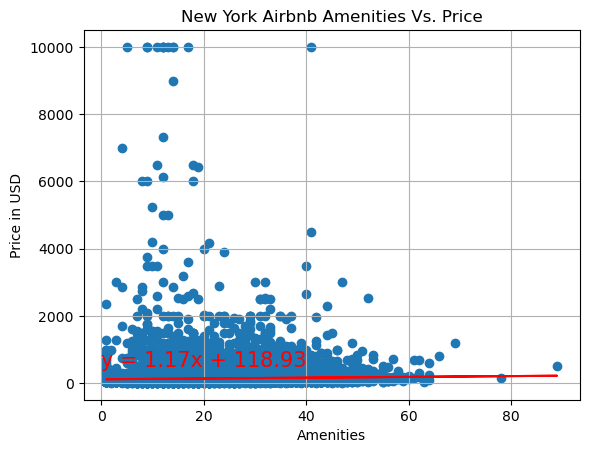

In [ ]:
#Plotted scatter plot showing price vs. amenities for New York Airbnbs. 
x_values = New_York_df["amenities"]
y_values = New_York_df["price"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,500),fontsize=15,color="red")
plt.title("New York Airbnb Amenities Vs. Price")
plt.ylabel("Price in USD")
plt.xlabel("Amenities")
plt.grid(True)
print(f"The r-value is: {rvalue} ")
plt.savefig("Airbnb Data/Fig1.png")
plt.show()

The r-value is: 0.11092649937513777 


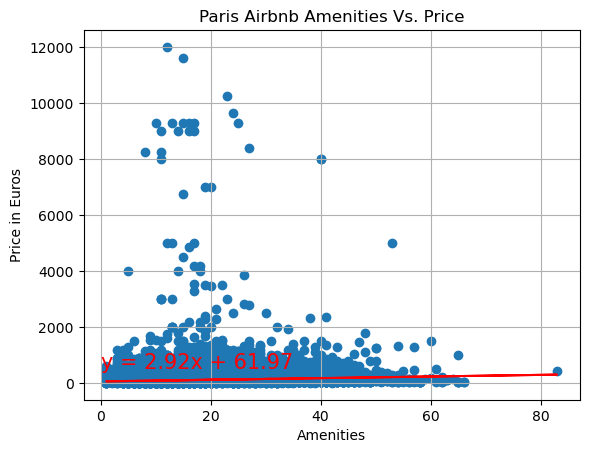

In [ ]:
#Plotted scatter plot showing price vs. amenities for Paris Airbnbs. 
x_values = Paris_df["amenities"]
y_values = Paris_df["price"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,500),fontsize=15,color="red")
plt.title("Paris Airbnb Amenities Vs. Price")
plt.ylabel("Price in Euros")
plt.xlabel("Amenities")
plt.grid(True)
print(f"The r-value is: {rvalue} ")
plt.savefig("Airbnb Data/Fig2.png")
plt.show()